## Time series classification for earthquake prediction

The tactical purpose is to und data prep and setup for time series classification (TSC) on seismic (earthquake) dataset. Also to prototype the advanced pipeline (seq to feature-extract to tabular-transofrmer-gpt2-synthethic to interpretable anomaly-detection.

Note-1: Task-1 on Ridgecrest-2019 seq can be TSC for year-pre (class-0) vs year-post (class-1) the event . . . look how to define event, and how to define the time step (or not). Can average or max by-minute or by-hour, or could use tsfresh/tsflex feature extraction to no need to impose a regular time-step on the data . . . interesting research question to do both and compare, etc . . . 

In [1]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 

In [2]:
data_train_raw = loadarff('../data_EQ_UCR/Earthquakes_TRAIN.arff')
df_train = pd.DataFrame(data_train_raw[0])

data_test_raw = loadarff('../data_EQ_UCR/Earthquakes_TEST.arff')
df_test = pd.DataFrame(data_test_raw[0])

print(df_train.shape, df_test.shape)
display(df_train.head(2))
display(df_test.head(2))

(322, 513) (139, 513)


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att504,att505,att506,att507,att508,att509,att510,att511,att512,target
0,-0.518009,-0.518009,2.654211,-0.518009,-0.518009,-0.518009,-0.518009,1.456243,2.558373,-0.518009,...,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,1.465826,-0.518009,b'1'
1,1.943733,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,...,3.365590,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,b'0'


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att504,att505,att506,att507,att508,att509,att510,att511,att512,target
0,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,3.136935,-0.269272,-0.269272,2.984190,-0.269272,...,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,b'0'
1,-0.468873,2.748038,1.626291,-0.468873,-0.468873,-0.468873,-0.468873,-0.468873,1.663373,-0.468873,...,1.617020,-0.468873,2.062011,-0.468873,-0.468873,-0.468873,-0.468873,1.635561,-0.468873,b'1'


In [3]:
df_train['target'].value_counts()

b'0'    264
b'1'     58
Name: target, dtype: int64

In [4]:
df_test['target'].value_counts()

b'0'    104
b'1'     35
Name: target, dtype: int64

data source: 

https://timeseriesclassification.com/description.php?Dataset=Earthquakes

The earthquake classification problem involves predicting whether a major event is about to occur based on the most recent readings in the surrounding area. The data is taken from Northern California Earthquake Data Center and each data is an averaged reading for one hour, with the first reading taken on Dec 1st 1967, the last in 2003. We transform this single time series into a classification problem by first defining a major event as any reading of over 5 on the Rictor scale. Major events are often followed by aftershocks. The physics of these are well understood and their detection is not the objective of this exercise. Hence we consider a positive case to be one where a major event is not preceded by another major event for at least 512 hours. To construct a negative case, we consider instances where there is a reading below 4 (to avoid blurring of the boundaries between major and non major events) that is preceded by at least 20 readings in the previous 512 hours that are non-zero (to avoid trivial negative cases). None of the cases overlap in time (i.e. we perform a segmentation rather than use a sliding window). Of the 86,066 hourly readings, we produce 368 negative cases and 93 positive.

Train Size: 322
Test Size: 139
Length: 512
Number of Classes: 2
Number of Dimensions: 1

Best Algorithm: RotF

Best Accuracy: 75.92%

PoC: A. Bagnall

Relevant Papers:

Bagnall, Anthony, Luke Davis, Jon Hills, and Jason Lines. "Transformation based ensembles for time series classification." In Proceedings of the 2012 SIAM international conference on data mining, pp. 307-318. Society for Industrial and Applied Mathematics, 2012.

Bagnall, Anthony, M. Flynn, J. Large, J. Line, A. Bostrom, and G. Cawley. "Is rotation forest the best classifier for problems with continuous features?." arXiv preprint arXiv:1809.06705 (2018).

Relevant Sites:

https://timeseriesclassification.com/description.php?Dataset=Earthquakes

https://timeseriesclassification.com/

https://github.com/sktime/sktime

https://pypi.org/project/sktime/

In [5]:
df = pd.concat([df_train, df_test])
df = df.reset_index(drop=True)
print(df.shape, df_train.shape, df_test.shape)
print(322 + 139)

display(df.head(3))
display(df.tail(3))

(461, 513) (322, 513) (139, 513)
461


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att504,att505,att506,att507,att508,att509,att510,att511,att512,target
0,-0.518009,-0.518009,2.654211,-0.518009,-0.518009,-0.518009,-0.518009,1.456243,2.558373,-0.518009,...,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,1.465826,-0.518009,b'1'
1,1.943733,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,...,3.365590,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,b'0'
2,2.638517,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,...,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,b'0'


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att504,att505,att506,att507,att508,att509,att510,att511,att512,target
458,1.852363,2.022497,-0.556382,-0.556382,-0.556382,1.431504,-0.556382,-0.556382,1.762819,-0.556382,...,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,b'1'
459,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,2.279107,-0.448388,-0.448388,...,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,1.983100,-0.448388,b'0'
460,-0.463868,1.604722,-0.463868,-0.463868,-0.463868,-0.463868,-0.463868,-0.463868,-0.463868,-0.463868,...,-0.463868,-0.463868,1.961375,-0.463868,-0.463868,2.552401,-0.463868,-0.463868,-0.463868,b'0'


In [6]:
df.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att504', 'att505', 'att506', 'att507', 'att508', 'att509', 'att510',
       'att511', 'att512', 'target'],
      dtype='object', length=513)

### Prepare Data for Feature Extraction

In [7]:
# separate target-label col from feature columns

df_y = df[['target']]
df_X = df.drop('target', axis=1)

print(df_X.shape, df_y.shape)

(461, 512) (461, 1)


In [8]:
df_X.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att503,att504,att505,att506,att507,att508,att509,att510,att511,att512
0,-0.518009,-0.518009,2.654211,-0.518009,-0.518009,-0.518009,-0.518009,1.456243,2.558373,-0.518009,...,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,1.465826,-0.518009
1,1.943733,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,...,2.457789,3.365590,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115
2,2.638517,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,...,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102
3,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,...,1.366900,-0.531138,2.147402,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138
4,-0.593665,2.020105,1.174727,-0.593665,-0.593665,1.606043,1.217859,1.588790,-0.593665,-0.593665,...,1.226485,-0.593665,-0.593665,-0.593665,1.493901,-0.593665,-0.593665,-0.593665,1.899337,-0.593665


In [9]:
# df_X

In [10]:
df_X = df_X.reset_index()

In [11]:
df_X_melt = pd.melt(df_X, 
                    id_vars=['index'],
                    value_vars=df_X.columns, 
                    var_name='step_cnt',
                    value_name = 'val'
                   )

In [12]:
df_X_melt

,index,step_cnt,val
0,0,att1,-0.518009
1,1,att1,1.943733
2,2,att1,2.638517
3,3,att1,-0.531138
4,4,att1,-0.593665
...,...,...,...
236027,456,att512,-0.553787
236028,457,att512,-0.559495
236029,458,att512,-0.556382
236030,459,att512,-0.448388


In [13]:
# df_X_melt['index'].value_counts()

### Viz Series

In [14]:
df_X_melt.head(2)

,index,step_cnt,val
0,0,att1,-0.518009
1,1,att1,1.943733


In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

C:\Users\m85302\AppData\Local\Temp\ipykernel_1192\251251691.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


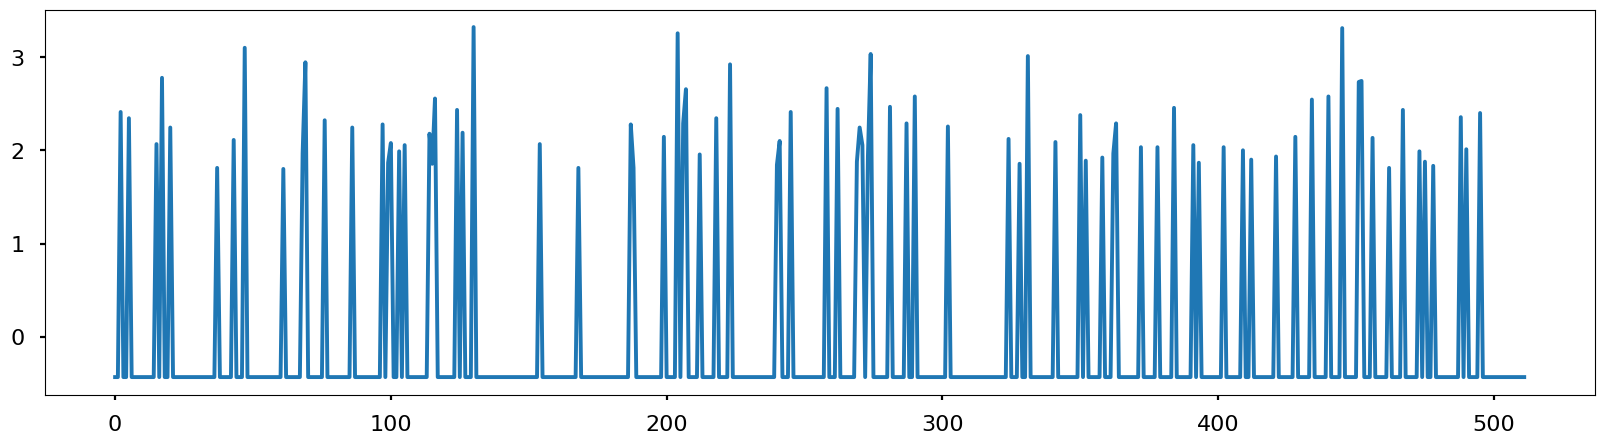

In [16]:
index_viz = 35

plt.figure(figsize=(20,5))
plt.style.use('seaborn-poster')
df_viz1 = df_X_melt[df_X_melt['index'] == index_viz]
df_viz1 = df_viz1.reset_index(drop=True)
df_viz1['val'].plot();

### Feature extraction from time series

In [17]:
from tsfresh import extract_features

In [18]:
# extracted_features = extract_features(df_melted, 
#                                       column_id="index", 
#                                       column_sort="flux")

In [19]:
df_X_melt.head(2)

,index,step_cnt,val
0,0,att1,-0.518009
1,1,att1,1.943733


In [20]:
df_extract = extract_features(df_X_melt, 
                              column_id = 'index',
                              column_sort = 'step_cnt'
                             )

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 29/29 [00:31<00:00,  1.10s/it]


In [21]:
print(df.shape, df_X.shape, df_y.shape)
print(df_extract.shape)

(461, 513) (461, 513) (461, 1)
(461, 783)


In [22]:
df_extract.head(2)

,val__variance_larger_than_standard_deviation,val__has_duplicate_max,val__has_duplicate_min,val__has_duplicate,val__sum_values,val__abs_energy,val__mean_abs_change,val__mean_change,val__mean_second_derivative_central,val__median,...,val__fourier_entropy__bins_5,val__fourier_entropy__bins_10,val__fourier_entropy__bins_100,val__permutation_entropy__dimension_3__tau_1,val__permutation_entropy__dimension_4__tau_1,val__permutation_entropy__dimension_5__tau_1,val__permutation_entropy__dimension_6__tau_1,val__permutation_entropy__dimension_7__tau_1,val__query_similarity_count__query_None__threshold_0.0,val__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,1.0,1.0,-1.600000e-06,511.000001,0.854810,0.000000,0.000000,-0.518009,...,1.059303,1.713239,3.677855,1.126175,1.772322,2.412038,3.011292,3.566047,NaN,3.026608
1,0.0,0.0,1.0,1.0,-6.400000e-07,511.000001,0.574479,-0.004495,0.002252,-0.353115,...,1.023638,1.688736,3.655390,0.722899,1.124103,1.508641,1.881498,2.209180,NaN,4.170268


### Prepare target class data format

In [23]:
df_y.value_counts()

target
b'0'      368
b'1'       93
dtype: int64

In [24]:
type(df_y['target'][0])

bytes

In [25]:
str(df_y['target'][0])

"b'1'"

In [26]:
df_y.shape

(461, 1)

In [28]:
df_y['target2'] = np.nan
for i in range(0, df_y.shape[0]):
    df_y['target2'][i] = str(df_y['target'][i])
    

C:\Users\m85302\AppData\Local\Temp\ipykernel_1192\1068490682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y['target2'] = np.nan
C:\Users\m85302\AppData\Local\Temp\ipykernel_1192\1068490682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y['target2'][i] = str(df_y['target'][i])


In [32]:
df_y['target2'][1]

"b'0'"

In [35]:
df_y['target_val'] = np.nan
for i in range(0, df_y.shape[0]):
    if df_y['target2'][i] == "b'1'":
        df_y['target_val'][i] = 1
    elif df_y['target2'][i] == "b'0'":
        df_y['target_val'][i] = 0
    else:
        print('no match! check data!')
        

C:\Users\m85302\AppData\Local\Temp\ipykernel_1192\2323533715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y['target_val'] = np.nan
C:\Users\m85302\AppData\Local\Temp\ipykernel_1192\2323533715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y['target_val'][i] = 1
C:\Users\m85302\AppData\Local\Temp\ipykernel_1192\2323533715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [36]:
df_y

,target,target2,target_val
0,b'1',b'1',1.0
1,b'0',b'0',0.0
2,b'0',b'0',0.0
3,b'0',b'0',0.0
4,b'1',b'1',1.0
...,...,...,...
456,b'1',b'1',1.0
457,b'0',b'0',0.0
458,b'1',b'1',1.0
459,b'0',b'0',0.0


In [38]:
df_y['target_val'].value_counts()

0.0    368
1.0     93
Name: target_val, dtype: int64

In [37]:
df_y['target'].value_counts()

b'0'    368
b'1'     93
Name: target, dtype: int64

In [39]:
df_y = df_y[['target_val']]
df_y

,target_val
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
456,1.0
457,0.0
458,1.0
459,0.0


### Machine learning

In [42]:
X = df_extract.values
y = df_y.values
print(X.shape, y.shape)

(461, 783) (461, 1)


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size, 
                                                    stratify=y) # random_state=1

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(368, 783) (93, 783) (368, 1) (93, 1)


In [ ]:
import numpy as np

In [45]:
print(np.count_nonzero(y_train==0))
print(np.count_nonzero(y_train==1))

294
74


In [47]:
import xgboost as xgb

In [48]:
clf = xgb.XGBClassifier()

In [49]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
y_pred = clf.predict(X_test)

In [52]:
# _pred

In [54]:
# ML model evaluation
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [55]:
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('precision: ' + str(precision_score(y_test, y_pred)))
print('recall: ' + str(recall_score(y_test, y_pred)))
print('f1: ' + str(f1_score(y_test, y_pred)))
print('roc_auc: ' + str(roc_auc_score(y_test, y_pred)))
confusion_matrix(y_test, y_pred)

accuracy: 0.7849462365591398
precision: 0.0
recall: 0.0
f1: 0.0
roc_auc: 0.49324324324324326


array([[73,  1],
       [19,  0]], dtype=int64)

In [56]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

ok, from baseline result, see that we definitely have some work to do !!!

(seeing mode collapse to the dominate class!)

Next step:   

Synthetic data generation, and feature selection . . . 

https://github.com/avsolatorio/REaLTabFormer

https://towardsdatascience.com/synthetic-tabular-data-generation-34eb94a992ed

misc finds: 

https://towardsdatascience.com/the-limitations-of-shap-703f34061d86

https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd

https://pypi.org/project/DataSynthesizer/

https://pypi.org/project/distfit/
https://erdogant.github.io/distfit/pages/html/Installation.html

In [57]:
from realtabformer import REaLTabFormer